In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

Import the required libraries and modules that you would need.
Read that data into Python and call the dataframe churnData.
Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
Check for null values in the dataframe. Replace the null values.
Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
Scale the features either by using normalizer or a standard scaler.
Split the data into a training set and a test set.
Fit a logistic regression model on the training data.
Check the accuracy on the test data.

In [3]:
churn_data = pd.read_csv(r"./files_for_lab/Customer-Churn.csv")

In [4]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [6]:
churn_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
churn_data['TotalCharges']=pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

In [8]:
#Check for null values in the dataframe

In [9]:
churn_data['TotalCharges']=churn_data['TotalCharges'].fillna(0)

In [10]:
#Use features only: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
#Scale using normalizer or a standard scaler.

In [11]:
final_data = ['tenure', 'SeniorCitizen', 'MonthlyCharges','TotalCharges']

In [12]:
scaled_data = churn_data[final_data]

In [13]:
scaler=StandardScaler()
scaled=scaler.fit_transform(scaled_data)
final_scaled=pd.DataFrame(scaled_data,columns=final_data)
final_scaled

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [14]:
X=final_scaled
y=churn_data['Churn']

In [15]:

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
#Fit a logistic regression model on the training data.

In [17]:
log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)

LogisticRegression()

In [18]:
log_regression.score(X_test,y_test)

0.7950780880265026

In [19]:
log_regression.score(X_train,y_train)

0.7910750507099391

In [20]:
#Check for the imbalance.

In [21]:
churn_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

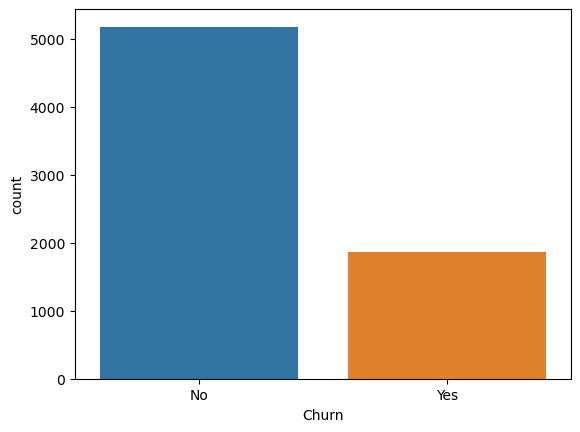

In [22]:
sns.countplot(x=churn_data['Churn'])

In [23]:
#Applying SMOTE

In [24]:
smote = SMOTE()
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X, y, test_size=0.3, random_state=42)
X_res_sm, y_res_sm = smote.fit_resample(X_train_sm, y_train_sm)
y_res_sm.value_counts()

No     3635
Yes    3635
Name: Churn, dtype: int64

In [25]:
#Fit the model to check for accuracy 

In [26]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_res_sm, y_res_sm)

y_sm_predictions = classification.predict(X_test_sm)
print(classification_report(y_test_sm, y_sm_predictions))


              precision    recall  f1-score   support

          No       0.90      0.67      0.77      1539
         Yes       0.48      0.81      0.60       574

    accuracy                           0.71      2113
   macro avg       0.69      0.74      0.69      2113
weighted avg       0.79      0.71      0.73      2113



In [64]:
#Trying a different technique-TomekLinks (undersamling)

In [27]:
from imblearn.under_sampling import TomekLinks

tomek = TomekLinks()

X_tl_train, X_tl_test, y_tl_train, y_tl_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_tl_train, y_tl_train = tomek.fit_resample(X_tl_train, y_tl_train)

classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_tl_train, y_tl_train)

predictions = classification.predict(X_tl_test)
print(classification_report(y_tl_test, predictions))

              precision    recall  f1-score   support

          No       0.86      0.82      0.84      1539
         Yes       0.56      0.64      0.60       574

    accuracy                           0.77      2113
   macro avg       0.71      0.73      0.72      2113
weighted avg       0.78      0.77      0.77      2113



In [ ]:
#the recall is better but the precision is lower than with the previous technique.